# Model of Helium Atoms inside a Latex Balloon
In this simulation, helium atoms will be modeled inside a latex balloon.  Each atom will have a mass of 4.0 g/mol and radius of 2.115e-9 meters, in a sphere with radius of 2.155e-09 meters.  The helium atoms will collide with one another and the balloon, creating elastic collisions until they escape the balloon.

# Research Question
1. How do helium atoms interact with one another inside of a balloon?
2. What happens to the atoms over time?
3. When does the balloon begin to lose helium atoms?

# Background

According to kinetic energy, the particles will collide elastically and bounce off of one another.  These particles will transfer energy from one another and increase in speed.  After some amount of time, the balloon will lose these particles through the helium atoms gaining enough speed to break through the latex material.  The way that latex is made up at a microscopic level, is that it has a lot of gaps/holes in it.  Over time, the particles are able to travel through these holes after reaching a certain speed.  The rate of diffusion (rate of deflation) for the balloon increases as the helium particles move quicker.  Theoretically, the temperature and the pressure will increase as the motion of the particles increases in space.  This is true due to the first law of thermodynamics and the ideal gas law:
$$U = W + Q$$,
$$W = P\Delta V$$,
$$P\Delta V = Nk_B \Delta T$$

$U$ is the themral energy, $W$ stands for work, and $Q$ is heat.  When looking at just work, it is equal to pressure, $P$, multiplied by the change in volume, $V$.  Going one step further to the ideal gas law also shows how to find work through the combination of multiplying the number of particles, $N$, with bolstman's constant, $k_B$, and the change in temperature, $\Delta T$.

For handling the collisions of the particles with the balloon being their boundary, one has to understand the physics behind it.  First, one has to take the dot product of the particles' velocities with the direction (unit vector) of their positions, then multiplied by their directions again to keep a directional component.  This gives a radial component to their velocities.  Then the change of this velocity has to be included in the final velocity after hitting their boundary (the balloon).  This is computed through multiplying -2 times the amount of the magnitude of the radial velocity component by the unit vector of their positions.  Then, the last aspect is to update the velocities by adding this change in the radial component to their intial velocities. 

# Computational Model
The simulation of the helium gas inside a latex balloon is below. The radius of the balloon is 2.115e-9m.  The model has a constant temperature of 300 K. The helium particles all begin with the same velocity and have random starting points.

Depending on how long one would like to run the simulation, as it gets very laggy, the following variables will have to be changed:

$N$ and $Nsteps$

# Assumptions

Assuming that elastic collisions occur between the helium atoms and the balloon's latex structure.

In [1]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
def check_collisions():
    """Determine all pairs of colliding spheres in the global particles[] list. 
        
    """
    collided_pairs = [] #a list of pairs of spheres that are overlapping
    
    for i in range(N):
        for j in range(i+1,N): #start at i+1 to avoid double counting and to avoid self-collision
            d = mag(particles[i].pos - particles[j].pos)
            if d < 2*R:
                collided_pairs.append([i,j])            
    
    return collided_pairs

In [3]:
def calc_collision(i,j):
    """Calculate new velocity, momentum, and position of pairs of colliding spheres in the global particles[] list. 

    Keyword arguments:
    i -- index of one colliding sphere
    j -- index of second colliding sphere

    """

    global particles
    
    r1 = particles[i].pos
    r2 = particles[j].pos
    v1 = particles[i].v
    v2 = particles[j].v
    p1 = m*v1
    p2 = m*v2
    v1i = v1
    v2i = v2
    
    #transform to reference frame of particle 1
    v2rel = v2 - v1
    r2rel = r2 - r1
    
    #find time when collision ocurred
    dx = dot(r2rel, hat(v2rel))
    dy = mag(cross(r2rel, hat(v2rel)))
    alpha = asin(dy/2/R)
    d = 2*R*cos(alpha) + dx
    deltat = d/mag(v2rel)
    
    #move particles backward in time to their locations at the collision
    particles[i].pos = particles[i].pos - particles[i].v*deltat
    particles[j].pos = particles[j].pos - particles[j].v*deltat
    
    #calculate new momenta using CM reference frame
    r1 = particles[i].pos
    r2 = particles[j].pos
    M = 2*m #total mass
    ptot = p1+p2 #total momentum
    vcm = ptot/M
    v1rel = v1 - vcm
    v2rel = v2 - vcm
    p1rel = m*v1rel
    p2rel = m*v2rel
    r = r2 - r1
    p1rel = p1rel - 2*dot(p1rel,hat(r))*hat(r)
    p2rel = p2rel - 2*dot(p2rel,hat(r))*hat(r)
    v1rel = p1rel/m
    v2rel = p2rel/m
    v1 = vcm + v1rel
    v2 = vcm + v2rel
    p1 = m*v1
    p2 = m*v2
    particles[i].v = v1
    particles[j].v = v2

    #move particles forward in time to their locations at the end of the time step
    particles[i].pos = particles[i].pos + particles[i].v*deltat
    particles[j].pos = particles[j].pos + particles[j].v*deltat

In [4]:
scene = canvas(title="N Particles in a Box")
#constants
m = 4.0/1000/6.02e23 #mass of atom in kg
R = 0.5e-10 #radius of atom in m
L = 40*R #length of box in m
thick = L/100 #thickness of box wall in m
k = 1.4e-23 #boltzmann constant
T = 300 #temp in K
s =  np.sqrt(2*3/2*k*T/m) #initial speed
h = L+2*R
q = h-16*R

boundary = sphere(pos = vec(0, 0, 0), radius = h+1.1*R, color=color.blue, opacity = 0.4)
scene.camera.follow(boundary)
scene.fov = 1000
# scene.range = 100
scene.autoscale = False
particles = [] #list of particles
time = []
position = []

N=100 #number of particles

#create particles
for i in range(N):
    if i==0:
        particle = sphere(pos = L/2*vec(rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.cyan, make_trail=True, retain=20, trail_radius=0.3*R)
    else:
        particle = sphere(pos = L/2*vec(rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.red)

    #initial velocity
    particle.v = s*hat(vec(rand.uniform(-1,1), rand.uniform(-1,1), rand.uniform(-1,1)))
    particle.p = m*particle.v

    particles.append(particle)

#check for collisions and rerandomize positions of particles that are collided
collided_pairs = check_collisions()
while len(collided_pairs)!=0:
    for pair in collided_pairs:
        particles[pair[0]].pos = L/2*vec(rand.uniform(-1,1),rand.uniform(-1,1),rand.uniform(-1,1))
        particles[pair[1]].pos = L/2*vec(rand.uniform(-1,1),rand.uniform(-1,1),rand.uniform(-1,1))
    collided_pairs = check_collisions()

#time
t = 0
dt = R/s/10
time.append(0)
position.append(N)
counter = 0

#histogram stuff
histograms = [] #a list of histograms after each time step
deltav = 100 # bin width for v histogram
nbins = int(6000/deltav) #number of bins
bin_edges = [int(i*deltav) for i in range(nbins)] #left side of bins

#store histogram
counts, binx = np.histogram([mag(particle.v) for particle in particles], bins=bin_edges, range=None, normed=None, weights=None, density=None)
histograms.append(counts)

#evolution
scene.pause()

Nsteps = 1e5 #number of time steps for the loop

while t < Nsteps*dt:
    rate(1000) #sets number of loops per second in order to slow down or speed up visualization

    #update position of each particle
    for particle in particles:
        particle.pos = particle.pos + particle.v*dt
        
    #handle collisions of particles with each other
    collided_pairs = check_collisions()
    for pair in collided_pairs:
        i = pair[0]
        j = pair[1]
        calc_collision(i,j)
#handle collisions with big sphere as boundary
    for particle in particles:
        if mag(particle.v)<4000: #(a fast speed that will allow an atom to escape the latex)
            if mag(particle.pos) > h:
                vrad = dot(particle.v,hat(particle.pos))*hat(particle.pos) #multiply by nhat (hat(particle.pos)) to get direction of vrad
                #vi outward, vf is inward
                dvrad = -2*mag(vrad)*hat(particle.pos)
                particle.v = particle.v + dvrad #particle.v is vf and then vi on right side of eqn
        if mag(particle.pos)<h+1.1*R:
            counter = counter + 1
    t = t + dt
    time.append(t)
    position.append(counter)
    counter = 0
    #store histogram
    counts, binx = np.histogram([mag(particle.v) for particle in particles], bins=bin_edges, range=None, normed=None, weights=None, density=None)
    histograms.append(counts)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
#calculate average histogram
Nhist = len(histograms)
histsum = np.zeros(len(histograms[0]))
for i in range(Nhist):
    histsum = histsum + histograms[i]
histave = histsum/Nhist

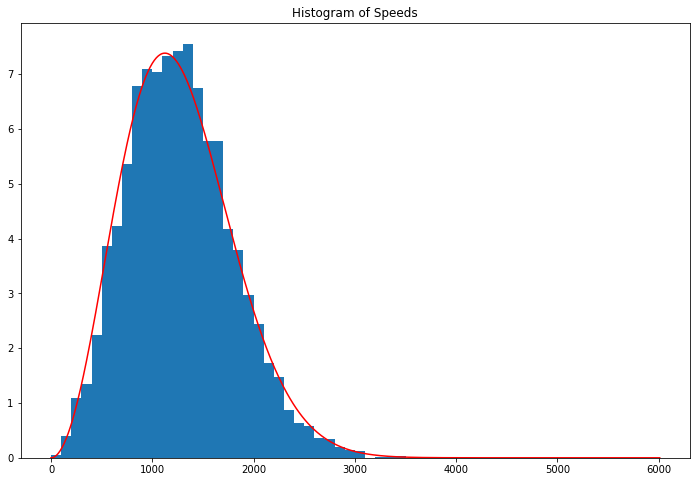

In [6]:
#plot histogram
#calculate speed at center of each bin
centers = [] #store speed at center of each bin
for i in range(len(binx)-1):
    vmiddle = (binx[i] + binx[i+1])/2 #calculate speed at center of bin
    centers.append(vmiddle)

## Add a theoretical plot
dv = 10
Ntheor = []
vtheory = []
for v in range(0,6001+dv,dv):
    Ntheor.append((deltav/dv)*N*4*pi*((m/(2*pi*k*T))**1.5) *exp(-0.5*m*(v**2)/(k*T))*(v**2)*dv ) # theoretical prediction
    vtheory.append(v)

#plot bar graph (histogram)
plt.figure(figsize=(12,8))
plt.bar(centers, histave, align='center', width=deltav)
plt.plot(vtheory,Ntheor,'r-')
plt.title('Histogram of Speeds')
plt.show()

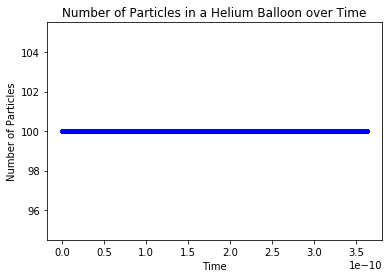

In [7]:
plt.plot(time,position,'b.')
plt.title('Number of Particles in a Helium Balloon over Time')
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.show()

# Conclusion

This simulation shows that over time, the helium particles will escape the balloon as they speed up.  At around 4000 m/s the atoms begin to fit between the latex gaps in the balloon.  The particles speed up fairly quickly and can escape as soon as 1e-11 seconds in a balloon with a radius of 2.115e-9m.  After 1.75e-10 seconds, about 25% of the atoms are able to escape the balloon.